# Problem Statement
Create an account: https://data.nasdaq.com/users/login
● Generate API key
● Fetch the data of four stock of your choice using Quandl RESTful API
● Apply necessary data pre-processing.
● Generate some visualization and mention their respective insights
● Implement Time Series Model ARIMA, SARIMA (you can use any other time series 
models as well)
● Evaluate model performance and comment on the results.
● Develop at least two Time Series models and compare their performance.


# Importing Packages
- quandl (for getting the data sets)
- matplotlib.pyplot, seaborn (for visualization)
- sklearn.metrics (to evaluate model performance)
- pmdarima(for time series models)
- numpy and pandas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import quandl
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
quandl.ApiConfig.api_key = 'ixNCK4chkyzGuGgdQEoV'

In [4]:
stock1 = quandl.get('BSE/BOM500209', start_date = "2015-03-20", end_date = "2020-03-20") #infosys
stock2 = quandl.get('YALE/SPCOMP', start_date = "2015-03-20", end_date = "2020-03-20") #yale econ dept 
stock3 = quandl.get('FRED/NROUST') #Federal Reserve Economic Data
stock4 = quandl.get('BATS/EDGA_TGH_PB') #BATS U.S. Stock Exchanges

In [5]:
stocks = [stock1, stock2, stock3, stock4]

In [6]:
stock1.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2015-03-20,2233.0,2269.5,2233.00,2258.95,2256.706681,78706.0,9129.0,177616356.0,32761.0,41.62,36.50,25.95
2015-03-23,2252.0,2275.0,2226.85,2232.40,2235.787086,360348.0,6685.0,805661405.0,302866.0,84.05,48.15,-19.60
2015-03-24,2230.0,2252.0,2206.25,2212.10,2225.500786,54726.0,5590.0,121792756.0,11356.0,20.75,45.75,-17.90
2015-03-25,2217.3,2227.7,2200.00,2217.70,2215.111856,73237.0,7082.0,162228147.0,20432.0,27.90,27.70,0.40
2015-03-26,2212.0,2213.5,2130.00,2144.45,2163.900265,113160.0,10333.0,244866954.0,52866.0,46.72,83.50,-67.55


# Understanding the data
- .columns ==> gives names of the columns as list
- .info() ==> gives information about th dataframe
- .dtypes ==> gives the data types of each column
- .describe() ==> gives the location statistics of each attribute in the data set

In [54]:
for st in stocks:
    display(st.columns)
    print("=========================")

Index(['Open', 'High', 'Low', 'Close', 'WAP', 'No. of Shares', 'No. of Trades',
       'Total Turnover', 'Deliverable Quantity', '% Deli. Qty to Traded Qty',
       'Spread H-L', 'Spread C-O'],
      dtype='object')

Index(['S&P Composite', 'Dividend', 'Earnings', 'CPI', 'Long Interest Rate',
       'Real Price', 'Real Dividend', 'Real Earnings',
       'Cyclically Adjusted PE Ratio', 'pred'],
      dtype='object')

Index(['Value'], dtype='object')

Index(['Short Volume', 'Total Volume'], dtype='object')

In [43]:
for st in stocks:
    st.info()
    print("=========================")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2015-03-20 to 2020-03-20
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       1235 non-null   float64
 1   High                       1235 non-null   float64
 2   Low                        1235 non-null   float64
 3   Close                      1235 non-null   float64
 4   WAP                        1235 non-null   float64
 5   No. of Shares              1235 non-null   float64
 6   No. of Trades              1235 non-null   float64
 7   Total Turnover             1235 non-null   float64
 8   Deliverable Quantity       1235 non-null   float64
 9   % Deli. Qty to Traded Qty  1235 non-null   float64
 10  Spread H-L                 1235 non-null   float64
 11  Spread C-O                 1235 non-null   float64
dtypes: float64(12)
memory usage: 157.7 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIn

In [51]:
for st in stocks:
    display(st.dtypes)
    print("=========================")

Open                         float64
High                         float64
Low                          float64
Close                        float64
WAP                          float64
No. of Shares                float64
No. of Trades                float64
Total Turnover               float64
Deliverable Quantity         float64
% Deli. Qty to Traded Qty    float64
Spread H-L                   float64
Spread C-O                   float64
dtype: object

S&P Composite                   float64
Dividend                        float64
Earnings                        float64
CPI                             float64
Long Interest Rate              float64
Real Price                      float64
Real Dividend                   float64
Real Earnings                   float64
Cyclically Adjusted PE Ratio    float64
pred                            float64
dtype: object

Value    float64
dtype: object

Short Volume    float64
Total Volume    float64
dtype: object

In [50]:
for st in stocks:    
    display(st.describe())
    print("=========================")

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000,1.235000e+03,1.235000e+03,1235.000000,1235.000000,1235.00000
mean,1018.448421,1028.582834,1006.915061,1017.224291,1017.535329,3.547678e+05,8062.242105,3.296047e+08,1.770989e+05,43.199547,21.667773,-1.22413
std,300.323743,302.840656,296.385379,299.160577,299.036182,5.868400e+05,9420.041940,5.129517e+08,4.020960e+05,15.845082,14.181224,15.31303
min,530.000000,557.700000,511.100000,535.050000,544.830000,3.259900e+04,1338.000000,4.721809e+07,7.200000e+03,4.490000,5.350000,-134.75000
25%,777.500000,784.850000,770.000000,777.400000,776.795000,1.201430e+05,4282.500000,1.304669e+08,4.236950e+04,32.720000,13.000000,-8.20000
50%,995.100000,1005.000000,986.000000,995.100000,995.440000,2.057110e+05,6205.000000,2.047894e+08,8.192300e+04,40.020000,18.200000,-0.95000
75%,1139.975000,1152.400000,1127.625000,1138.325000,1141.130000,3.739745e+05,8805.500000,3.311683e+08,1.781240e+05,51.170000,26.075000,6.92500
max,2252.000000,2275.000000,2233.000000,2258.950000,2256.706681,1.177179e+07,156020.000000,7.751263e+09,9.051220e+06,97.090000,168.000000,90.45000


,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio,pred
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,13.000000
mean,2492.440648,48.901707,109.902167,246.585267,2.254933,2814.992463,55.293963,124.082621,28.735219,88.528121
std,380.480910,5.367140,18.515406,7.116463,0.448283,351.197424,4.482585,17.521362,2.362450,29.515113
min,1904.420000,40.810000,86.440000,236.119000,1.500000,2244.416690,48.297885,100.777295,24.002607,0.000000
25%,2108.777500,44.411667,92.566667,240.528250,1.847500,2476.573098,51.541409,107.815924,26.719406,87.906683
50%,2474.530000,48.011667,106.570000,246.021500,2.250000,2811.940793,54.501082,120.973878,29.158221,92.076712
75%,2790.760000,53.397500,131.223333,252.219250,2.540000,3086.244440,59.251235,144.413681,30.431289,96.356745
max,3278.202857,59.133736,139.470000,258.678000,3.150000,3551.054971,63.880496,151.664548,33.307344,136.095042


,Value
count,332.000000
mean,5.370353
std,0.576370
min,4.272470
25%,5.001920
50%,5.405632
75%,5.823668
max,6.239927


,Short Volume,Total Volume
count,67.000000,67.000000
mean,491.477612,1738.597015
std,1732.478513,3710.866566
min,0.000000,1.000000
25%,0.000000,100.000000
50%,106.000000,300.000000
75%,331.500000,1461.000000
max,13635.000000,20451.000000


# Data Pre-processing

# 1. Handling missing values

In [11]:
stock1.isna().sum()

Open                         0
High                         0
Low                          0
Close                        0
WAP                          0
No. of Shares                0
No. of Trades                0
Total Turnover               0
Deliverable Quantity         2
% Deli. Qty to Traded Qty    2
Spread H-L                   0
Spread C-O                   0
dtype: int64

### Since the number of missing values is low compared to entire data set, it is more efficient to just remove it

In [12]:
stock1.dropna(axis=0, inplace=True)

In [13]:
stock1.isna().sum()

Open                         0
High                         0
Low                          0
Close                        0
WAP                          0
No. of Shares                0
No. of Trades                0
Total Turnover               0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread H-L                   0
Spread C-O                   0
dtype: int64

In [14]:
stock2.isna().sum()

S&P Composite                   0
Dividend                        0
Earnings                        0
CPI                             0
Long Interest Rate              0
Real Price                      0
Real Dividend                   0
Real Earnings                   0
Cyclically Adjusted PE Ratio    0
dtype: int64

In [15]:
stock3.isna().sum()

Value    0
dtype: int64

In [16]:
stock4.isna().sum()

Short Volume    0
Total Volume    0
dtype: int64

## 2. Handling Outliers 

In [17]:
print("NUMBER OF OUTLIERS IN EACH COLUMN")
for st in stocks:
    for col in st.columns:
        q1, q3 = st[col].quantile(0.25), st[col].quantile(0.75)
        iqr = q3-q1
        low = q1 - (iqr*1.5)
        up = q3 + (iqr*1.5)
        print(col, st[col][st[col] < low].count() + st[col][st[col] > up].count())
    print('-------------------------------------------------------------------')

NUMBER OF OUTLIERS IN EACH COLUMN
Open 57
High 57
Low 57
Close 57
WAP 57
No. of Shares 115
No. of Trades 81
Total Turnover 120
Deliverable Quantity 115
% Deli. Qty to Traded Qty 50
Spread H-L 67
Spread C-O 57
-------------------------------------------------------------------
S&P Composite 0
Dividend 0
Earnings 0
CPI 0
Long Interest Rate 0
Real Price 0
Real Dividend 0
Real Earnings 0
Cyclically Adjusted PE Ratio 0
-------------------------------------------------------------------
Value 0
-------------------------------------------------------------------
Short Volume 6
Total Volume 8
-------------------------------------------------------------------


### Outliers exist only in the 1st dataset 

In [18]:
skews = stock1.skew(axis=0)
skews

Open                          1.894292
High                          1.884120
Low                           1.869170
Close                         1.867486
WAP                           1.867581
No. of Shares                 9.996150
No. of Trades                 8.434313
Total Turnover                8.127359
Deliverable Quantity         12.399401
% Deli. Qty to Traded Qty     0.901283
Spread H-L                    3.455172
Spread C-O                   -1.162467
dtype: float64

### In the above insights, it can be seen that many attributes are skewed, implying that the values are non-uniformly distributed. So inorder to handle this, log transformation is applied on such attributes
The outliers are necessary in the case of stock data, hence they cannot be removed directly. Log transformation is used because it can reduce the skewness as well as transform the data which makes it easier to visualize

In [19]:
stock1_new = pd.DataFrame()

In [20]:
for col in stock1.columns:
    skew = stock1[col].skew()
    if skew<-2 or skew>2:
        stock1_new[col] = stock1[col].map(lambda i: np.log(i) if i > 0 else 0)
    else:
        stock1_new[col] = stock1[col]

In [21]:
stock1_new.skew(axis=0)

Open                         1.894292
High                         1.884120
Low                          1.869170
Close                        1.867486
WAP                          1.867581
No. of Shares                0.699372
No. of Trades                0.892957
Total Turnover               0.945431
Deliverable Quantity         0.625394
% Deli. Qty to Traded Qty    0.901283
Spread H-L                   0.498391
Spread C-O                  -1.162467
dtype: float64

### Now, the skew is in an acceptable range

# Visualization

### Raw data Visualization 

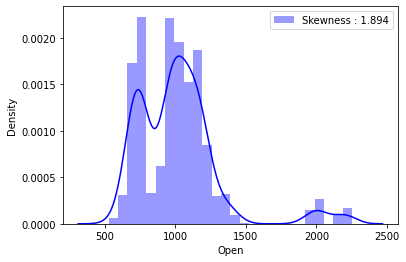

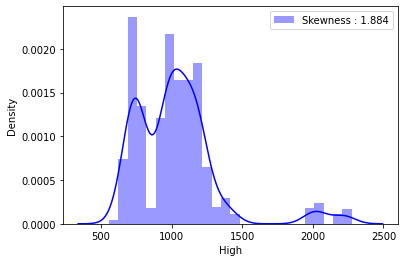

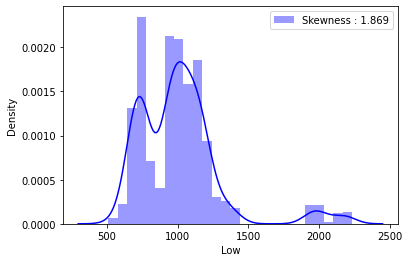

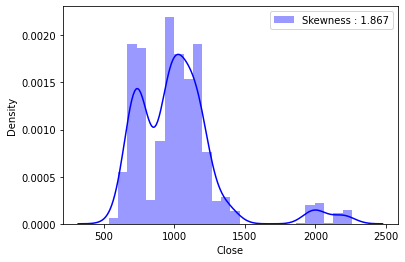

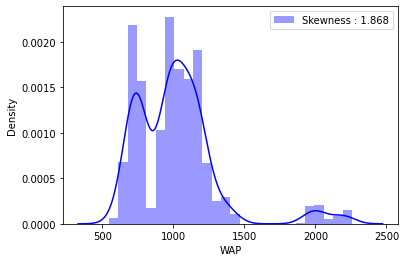

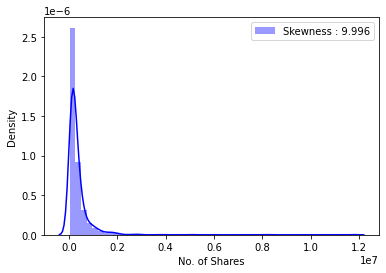

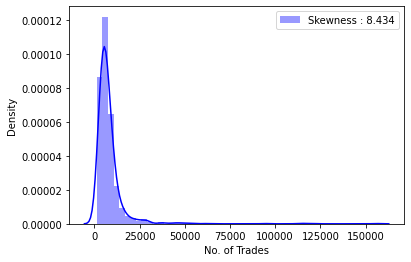

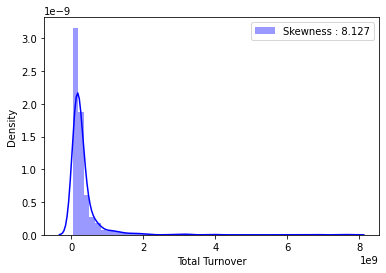

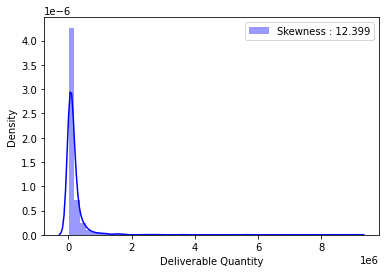

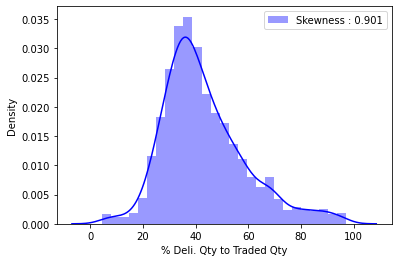

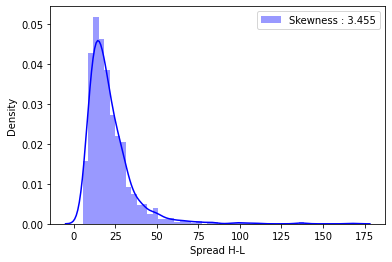

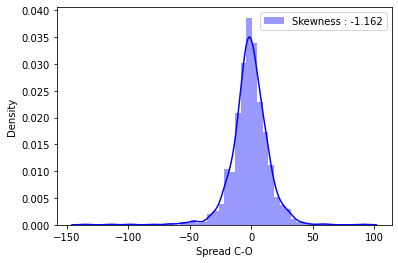

In [22]:
for col in stock1.columns:
    fig, axes = plt.subplots()
    sns.distplot(stock1[col], color="b", label="Skewness : %.3f"%(stock1[col].skew())).legend(loc="best")

### After handling outliers and adjusting skewness 

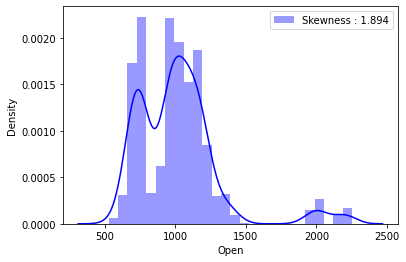

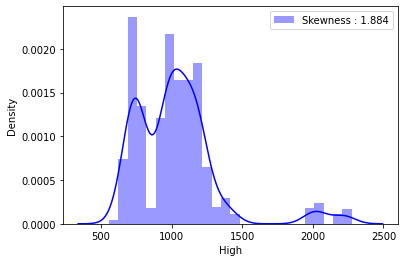

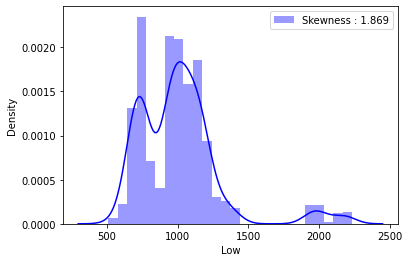

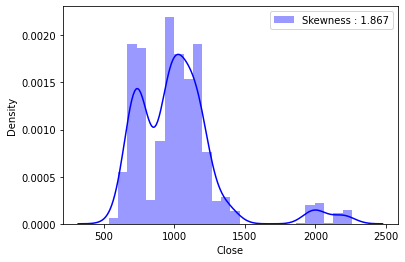

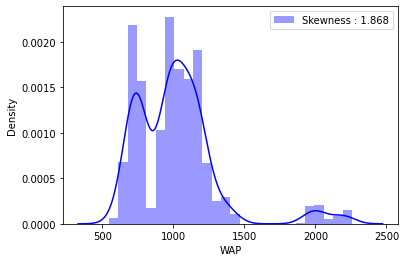

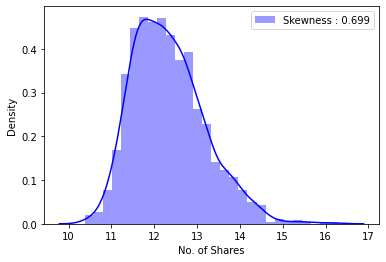

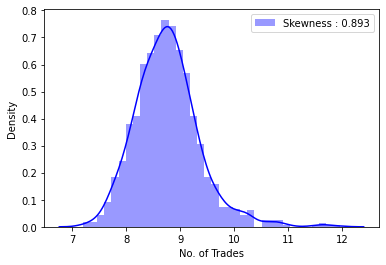

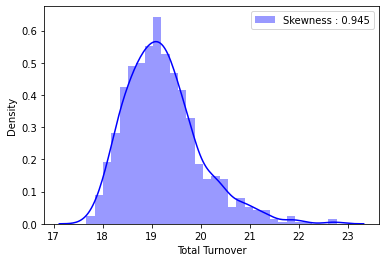

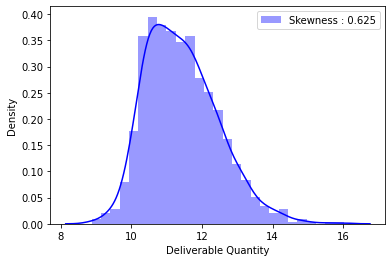

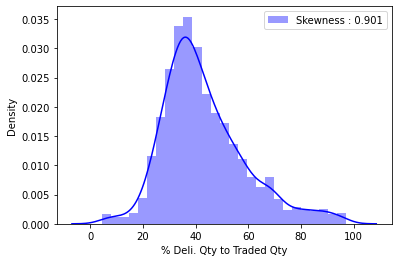

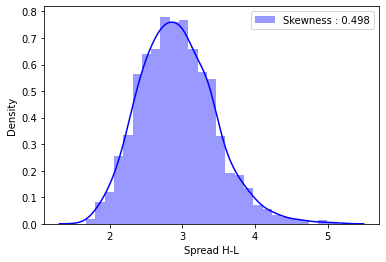

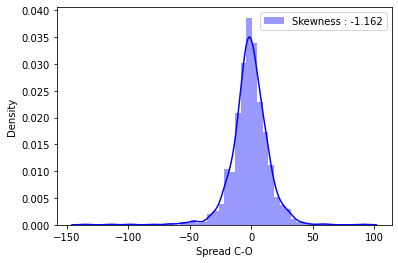

In [23]:
for col in stock1.columns:
    fig, axes = plt.subplots()
    sns.distplot(stock1_new[col], color="b", label="Skewness : %.3f"%(stock1_new[col].skew())).legend(loc="best")

## Raw Data Visualization of Stock 2 

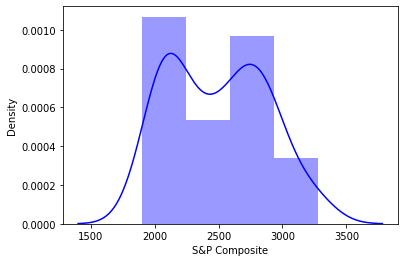

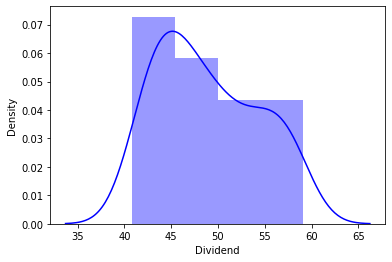

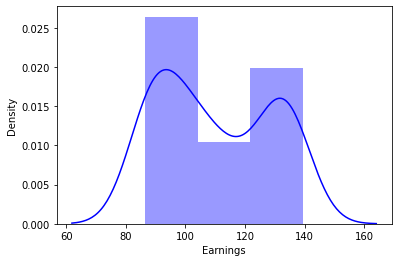

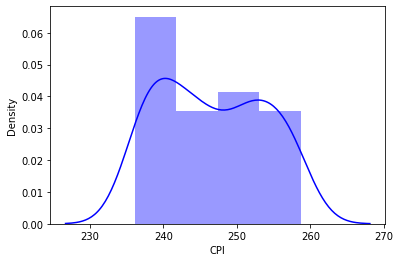

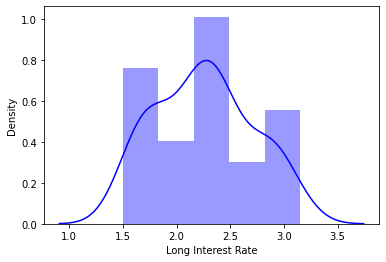

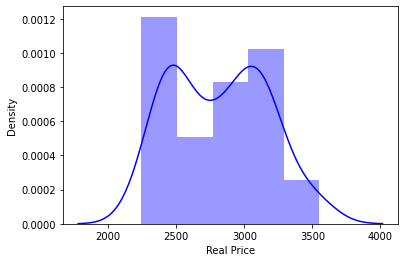

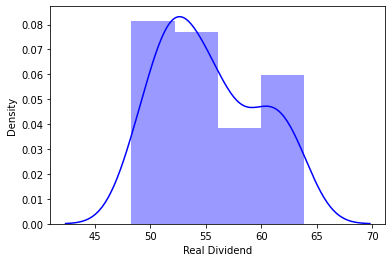

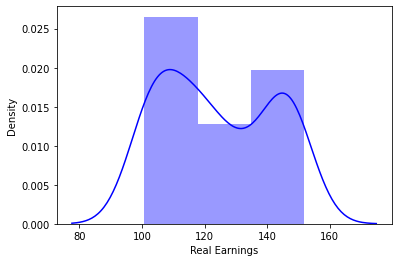

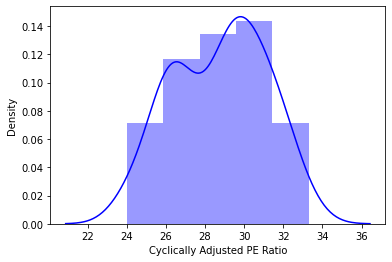

In [24]:
for col in stock2.columns:
    fig, axes = plt.subplots()
    sns.distplot(stock2[col], color="b")

## Visualization of Stock 3 

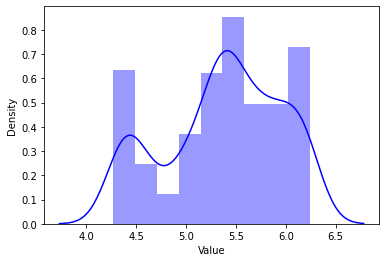

In [25]:
for col in stock3.columns:
    fig, axes = plt.subplots()
    sns.distplot(stock3[col], color="b")

## Visualization of Stock 4

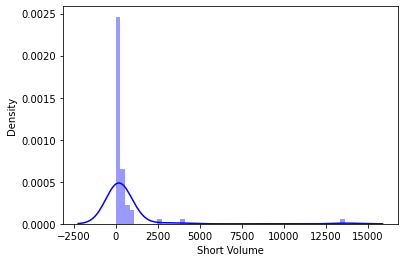

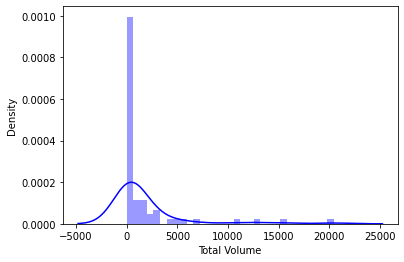

In [26]:
for col in stock4.columns:
    fig, axes = plt.subplots()
    sns.distplot(stock4[col], color="b")

## Scatter Plot Matrix 

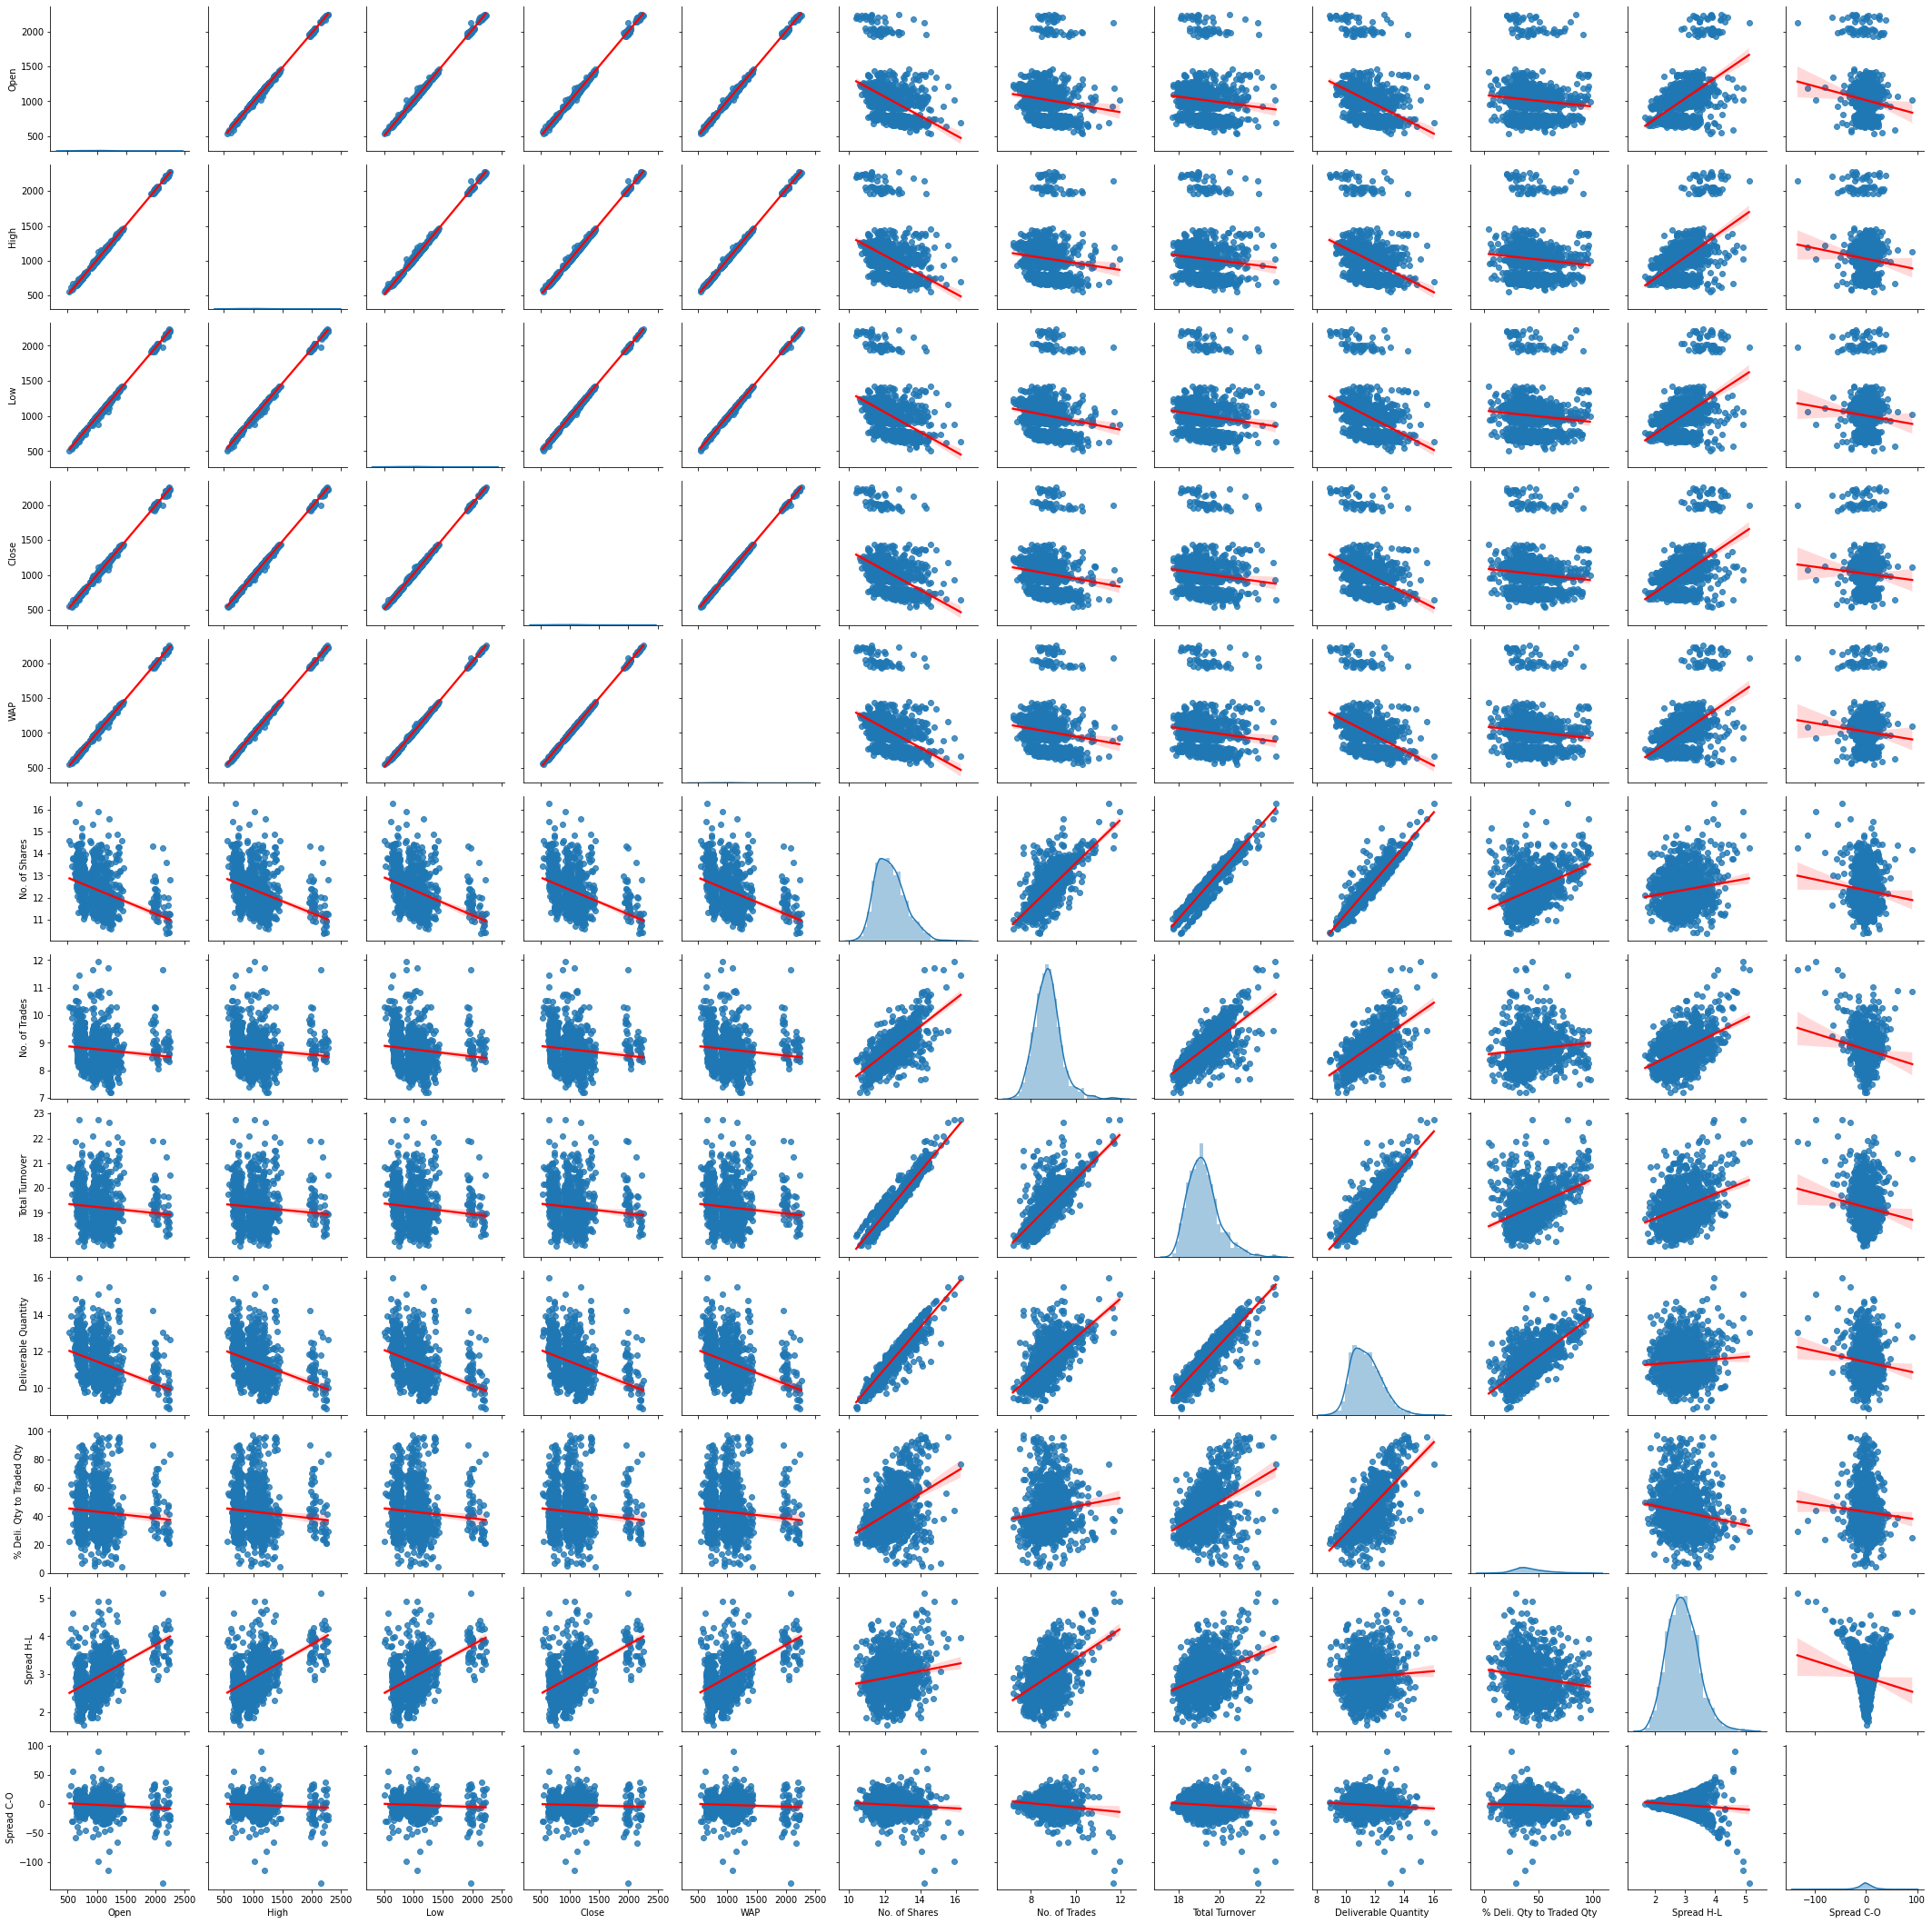

In [27]:
matrix = sns.PairGrid(stock1_new)
matrix.map_diag(sns.distplot)
matrix.map_lower(sns.regplot, line_kws={"color": "red"})
matrix.map_upper(sns.regplot, line_kws={"color": "red"})

matrix

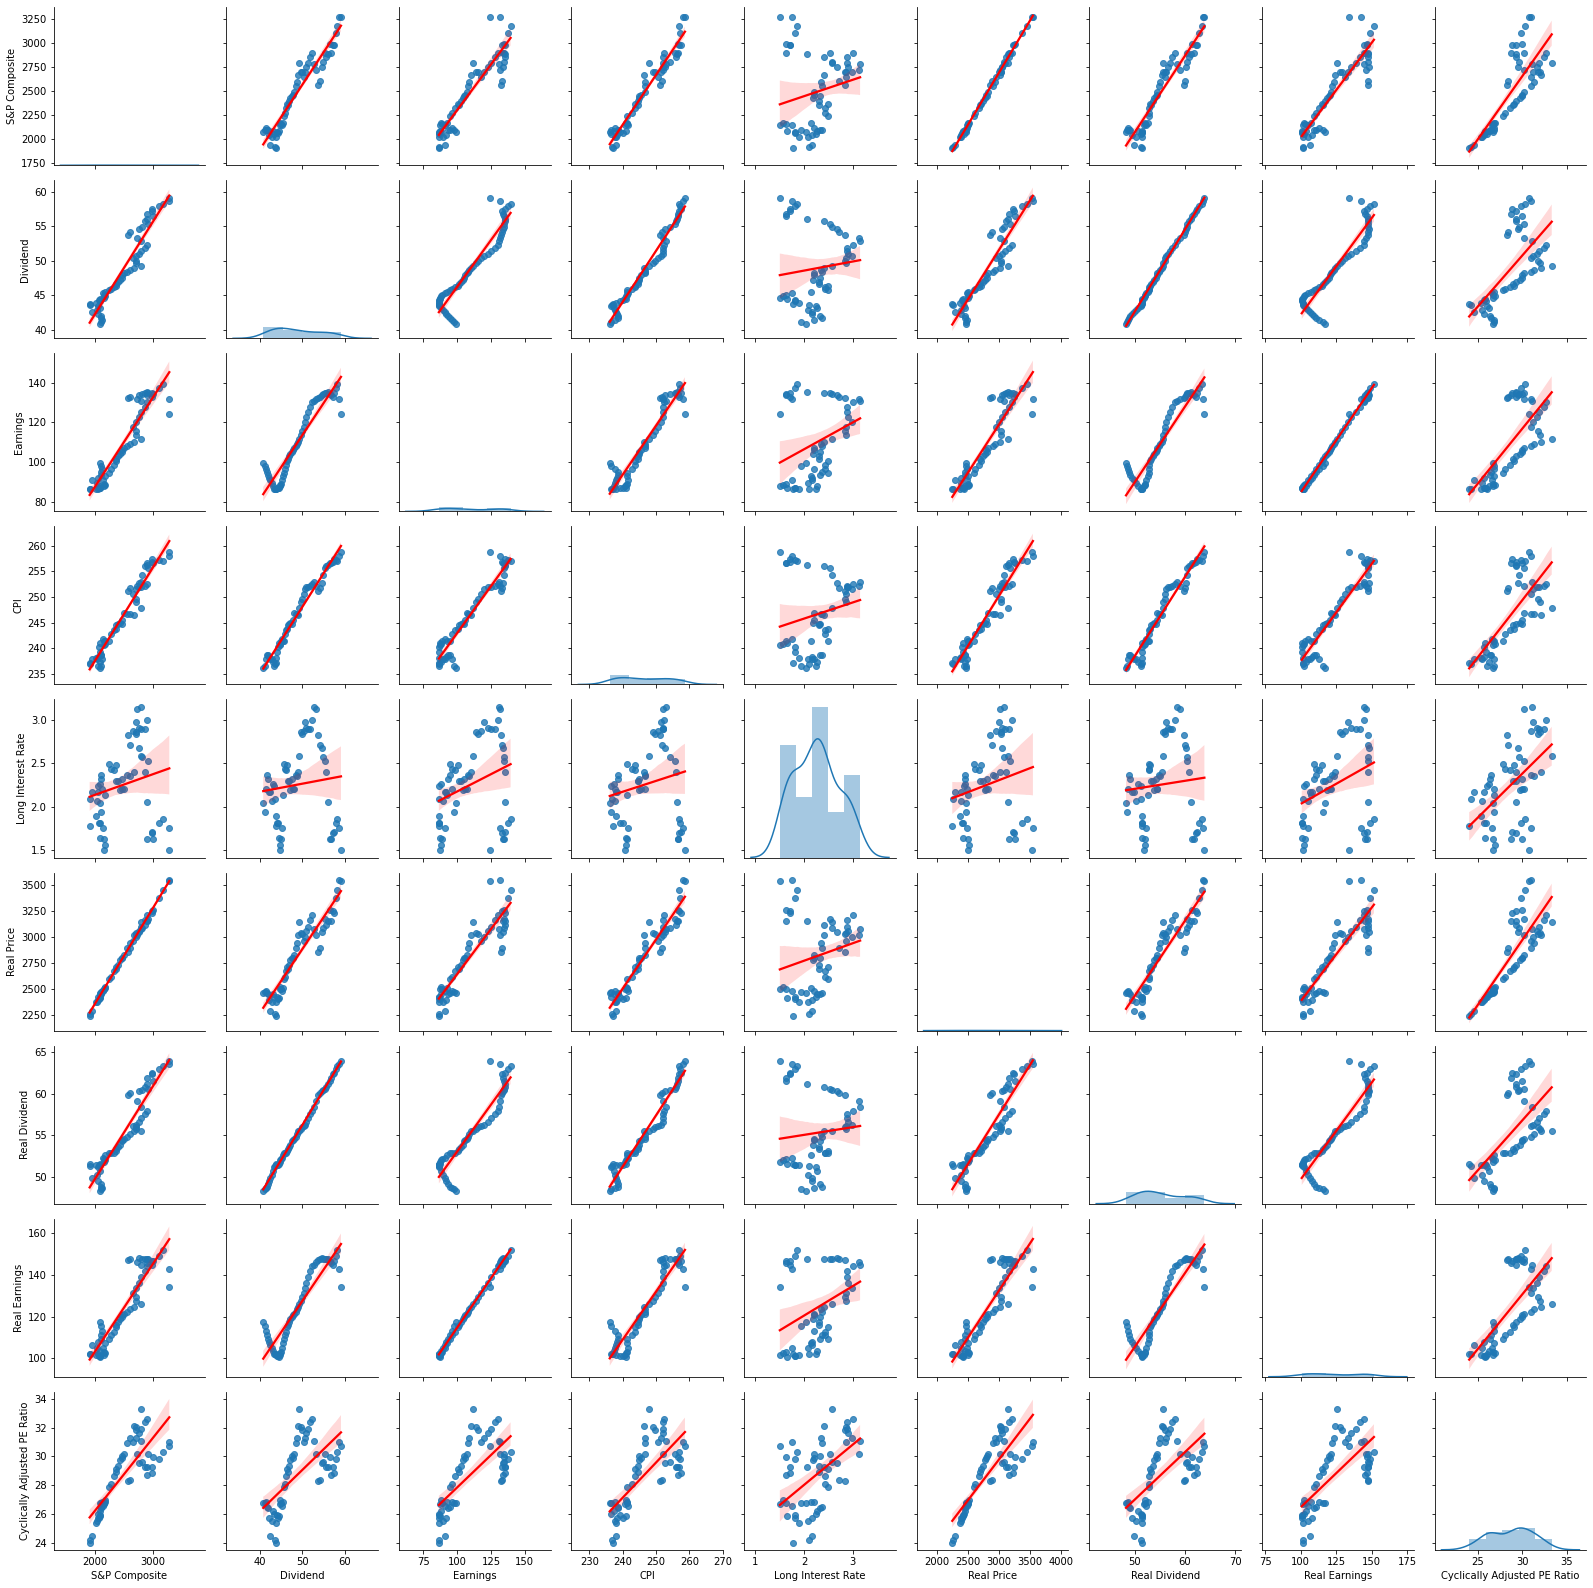

In [28]:
matrix = sns.PairGrid(stock2)
matrix.map_diag(sns.distplot)
matrix.map_lower(sns.regplot, line_kws={"color": "red"})
matrix.map_upper(sns.regplot, line_kws={"color": "red"})

matrix

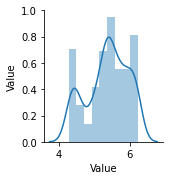

In [29]:
matrix = sns.PairGrid(stock3)
matrix.map_diag(sns.distplot)
matrix.map_lower(sns.regplot, line_kws={"color": "red"})
matrix.map_upper(sns.regplot, line_kws={"color": "red"})

matrix

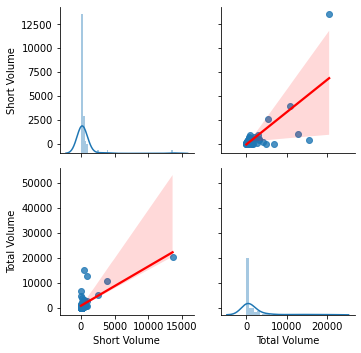

In [30]:
matrix = sns.PairGrid(stock4)
matrix.map_diag(sns.distplot)
matrix.map_lower(sns.regplot, line_kws={"color": "red"})
matrix.map_upper(sns.regplot, line_kws={"color": "red"})

matrix

## Series Plot 

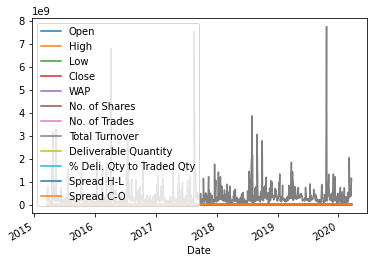

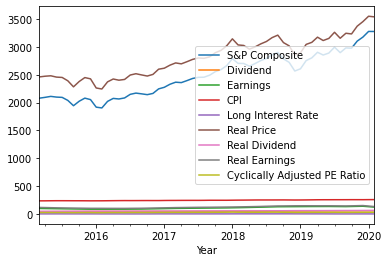

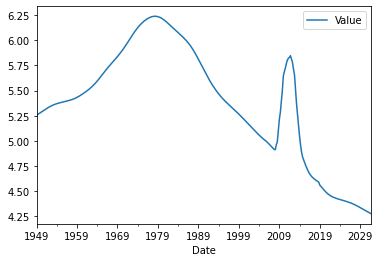

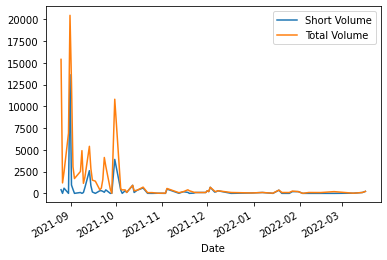

In [31]:
for st in stocks:
    st.plot()

# Insights
- **Diagonals:** contain the histogram corresponding to the respective attribute.
- **Positive relationship:** The attribute pairs containing positive slope lines of the regplot have positive relationship
- **Negative relationship:** The attribute pairs containing negative slope lines of the regplot have negative relationship
- The lines having a very small absolute slope implies that the pair of attributes are not very corelated

# Time Series Models

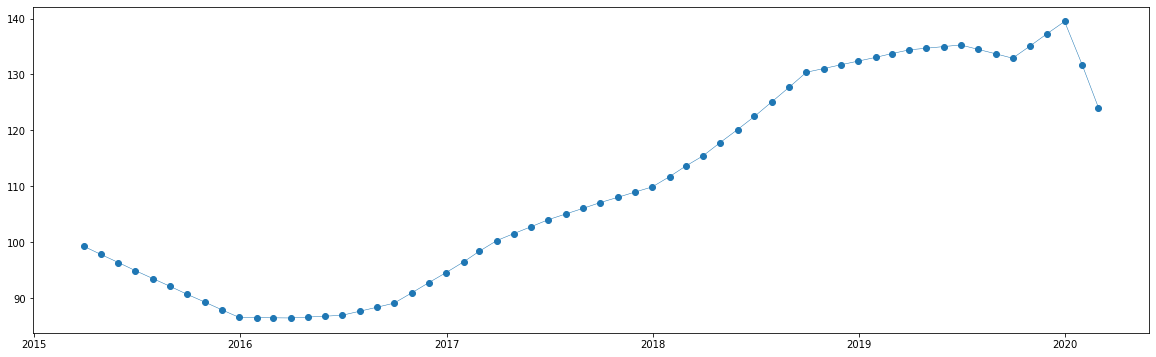

In [32]:
y = stock2['Earnings']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='o', linestyle='-', linewidth=0.5)

In [33]:
#pip install pmdarima

In [34]:
from pmdarima.arima import auto_arima
import math

# ARIMA Model of Stock 2

In [35]:
Stock_data_arima = stock2['Earnings']

train_test_split_ratio = int(len(Stock_data_arima)*0.8)
train_data, test_data = Stock_data_arima[:train_test_split_ratio], Stock_data_arima[train_test_split_ratio:]

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=62.691, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=58.697, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=60.691, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=60.691, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=57.199, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.104 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 -27.600
Date:                Sun, 20 Mar 2022   AIC                             57.199
Time:                        16:27:18   BIC                             59.028
Sample:                             0   HQIC                            57.884
                                 - 48                                         
Covaria

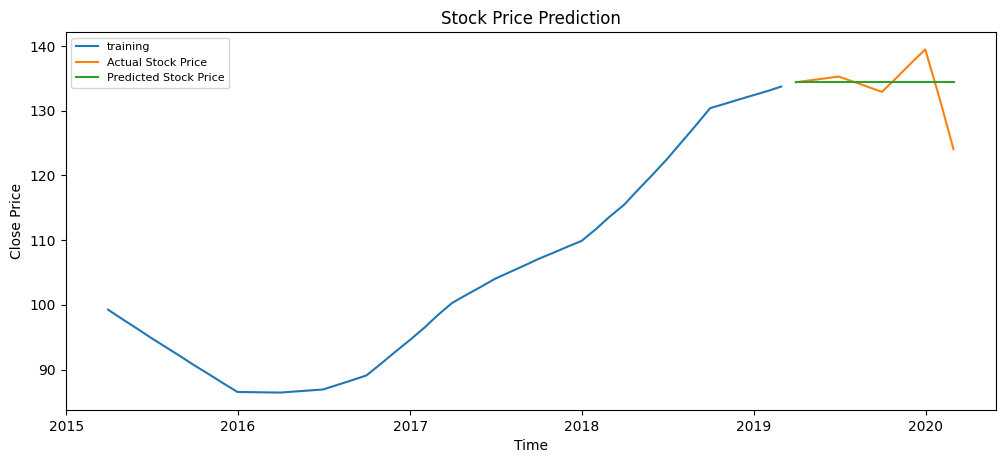

Auto-Arima RMSE :- 3.566


In [36]:
arima_model = auto_arima(train_data,
                      start_p=1, start_q=1,
                      max_p=5, max_q=5,
                      test='adf',        
                      trace=True,
                      alpha=0.05,
                      scoring='mse',
                      suppress_warnings=True,
                      seasonal = False
                      )

# Fitting the final model with the order
fitted_model = arima_model.fit(train_data) 
print(fitted_model.summary())

# Forecasting the values.
forecast_values = fitted_model.predict(len(test_data), alpha=0.05) 
fcv_series = pd.Series(forecast_values[0], index=test_data.index)

#Plotting the predicted stock price and original price.
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='Actual Stock Price')
plt.plot(fcv_series,label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Evaluating the model by calculating RMSE.
rms_auto_arima = math.sqrt(mean_squared_error(test_data.values, fcv_series))
print("Auto-Arima RMSE :- " + str(round(rms_auto_arima,3)))

## SARIMA Model of Stock 2 

In [37]:
Stock_data_sarima = stock2['Earnings']

train_test_split_ratio = int(len(Stock_data_sarima)*0.8)
train_data, test_data = Stock_data_sarima[:train_test_split_ratio], Stock_data_sarima[train_test_split_ratio:]

In [38]:
import statsmodels.api as sm

In [39]:
model=sm.tsa.statespace.SARIMAX(train_data,order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

c:\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Year'>

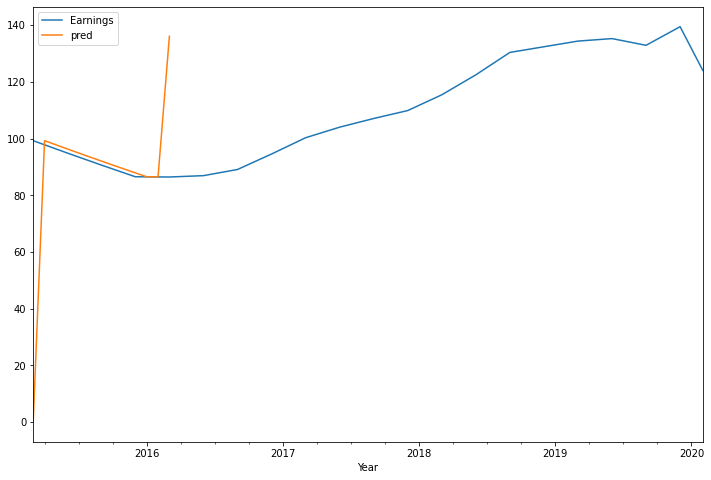

In [40]:
stock2['pred']=results.predict(start=0,end=len(test_data))
stock2[['Earnings','pred']].plot(figsize=(12,8))

In [41]:
rms = math.sqrt(mean_squared_error(test_data.values, stock2['pred'][:len(test_data)].values))

print("Sarima RMSE :- " + str(round(rms,3)))

Sarima RMSE :- 55.866


# Comparison:
Since the RMSE (Root Mean Squared Error) value of ARIMA Model is lower, it is a better performing model compared to SARIMA.